<a href="https://colab.research.google.com/github/dr-zool/tcu-ai/blob/main/lab-module/10_0_yolo_webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install supervision
!pip install inference-gpu[yolo-world]
#!pip install inference-cpu[yolo-world]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 943.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import cv2
from tqdm import tqdm
import supervision as sv
from inference.models.yolo_world.yolo_world import YOLOWorld

RuntimeError: Only a single TORCH_LIBRARY can be used to register the namespace prims; please put all of your definitions in a single TORCH_LIBRARY block.  If you were trying to specify implementations, consider using TORCH_LIBRARY_IMPL (which can be duplicated).  If you really intended to define operators for a single namespace in a distributed way, you can use TORCH_LIBRARY_FRAGMENT to explicitly indicate this.  Previous registration of TORCH_LIBRARY was registered at /dev/null:241; latest registration was registered at /dev/null:241

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")

Creating inference sessions


CLIP model loaded in 5.61 seconds


In [ ]:
classes = ["eye", "lips", "head" , "person"]
model.set_classes(classes)

In [ ]:
results = model.infer("https://media.roboflow.com/inference/people-walking.jpg")

In [ ]:
results

ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=3.380615708999983, image=InferenceResponseImage(width=1920, height=1080), predictions=[ObjectDetectionPrediction(x=1466.859130859375, y=796.1629028320312, width=112.7490234375, height=184.5640869140625, confidence=0.9058711528778076, class_name='person', class_confidence=None, class_id=3, tracker_id=None, detection_id='faa5b7d4-cd99-4872-b397-400935bd3b2a', parent_id=None), ObjectDetectionPrediction(x=87.00091552734375, y=892.4357299804688, width=107.6764907836914, height=191.531982421875, confidence=0.9040673971176147, class_name='person', class_confidence=None, class_id=3, tracker_id=None, detection_id='55201e0c-ebfb-4181-8b60-593535266724', parent_id=None), ObjectDetectionPrediction(x=704.931640625, y=751.3302612304688, width=77.4267578125, height=201.139892578125, confidence=0.899662435054779, class_name='person', class_confidence=None, class_id=3, tracker_id=None, detection_id='a6e066ff-d60

In [ ]:
from IPython.display import display, Javascript, Image, clear_output
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import time

# Function to take a photo using a webcam in Colab
def take_photo(filename='photo.jpg', quality=0.5):
    js = Javascript('''
    async function takePhoto(quality) {
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      // Wait for a short time to allow the camera to adjust
      await new Promise(resolve => setTimeout(resolve, 3000));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js(f'takePhoto({quality})')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


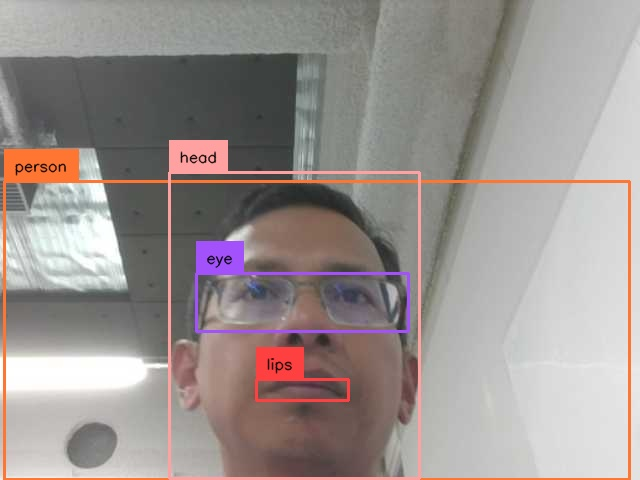

<IPython.core.display.Javascript object>

Stopped the photo capture.


In [ ]:

# Initialize annotators
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=1, text_scale=0.5, text_color=sv.Color.BLACK)

try:
    while True:
        # Capture photo
        filename = take_photo()
        print(f'Saved to {filename}')

        # Load image for inference and annotation
        frame = cv2.imread(filename)
        results = model.infer(frame, confidence=0.002)
        detections = sv.Detections.from_inference(results).with_nms(threshold=0.8)

        # Annotate image
        annotated_frame = BOUNDING_BOX_ANNOTATOR.annotate(frame, detections)
        annotated_frame = LABEL_ANNOTATOR.annotate(annotated_frame, detections)

        # Save and display the annotated image
        annotated_filename = 'annotated_' + filename
        cv2.imwrite(annotated_filename, annotated_frame)

        # Clear previous output and display new image
        clear_output(wait=True)
        display(Image(annotated_filename))

        # Wait for a short period before taking the next photo
        #time.sleep(1)  # Adjust the sleep time as needed

except KeyboardInterrupt:
    print("Stopped the photo capture.")
except Exception as err:
    print(str(err))  # Error handling for webcam access